<a href="https://colab.research.google.com/github/yrb1802/Wine-Quality-Prediction/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML Project Datasets/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
# Finding any missing values-

df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Checking the number of rows and columns-

print(f"Number of rows: {df.shape[0]}  &  Number of columns:  {df.shape[1]}")

Number of rows: 1143  &  Number of columns:  13


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Dropping ID feature beacause it adds no value to the model

df.drop('Id',axis=1,inplace=True)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

# **EDA - Exploratory Data Analysis-**

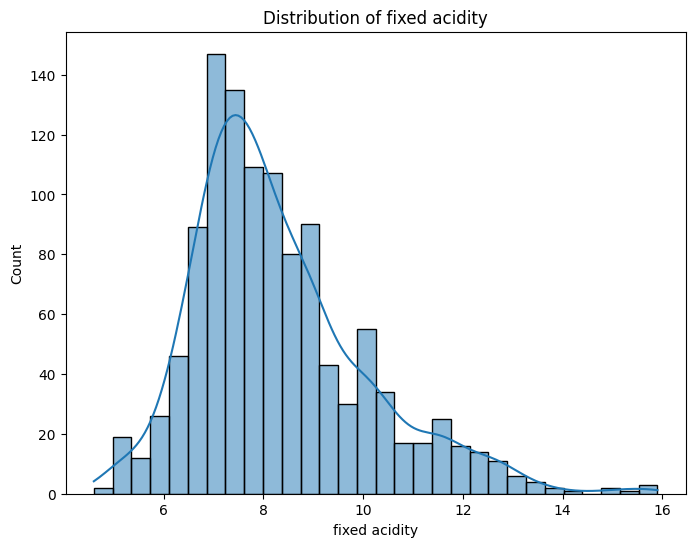

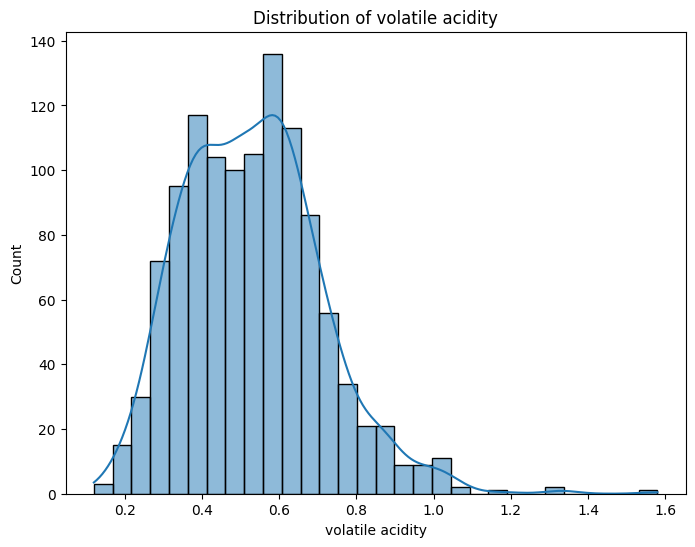

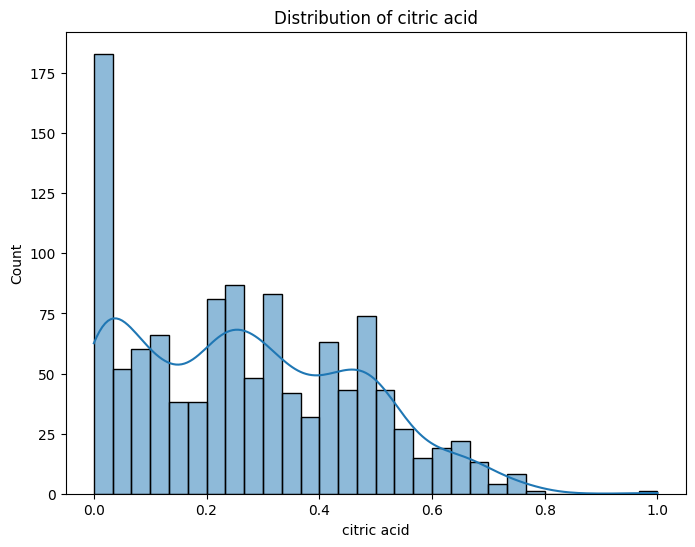

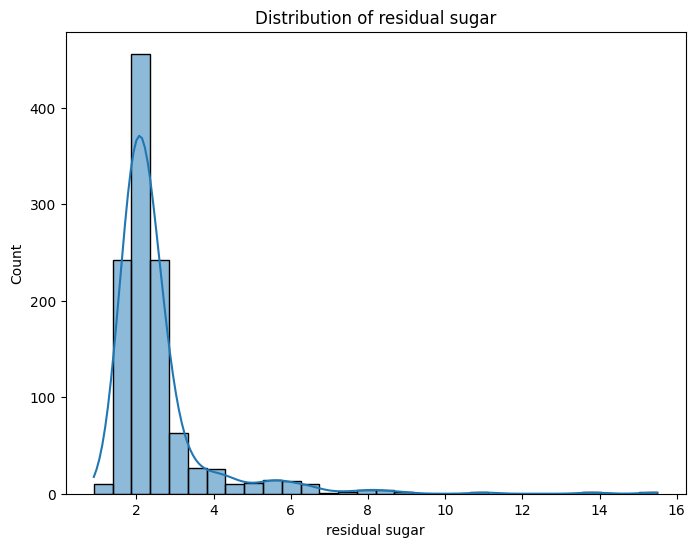

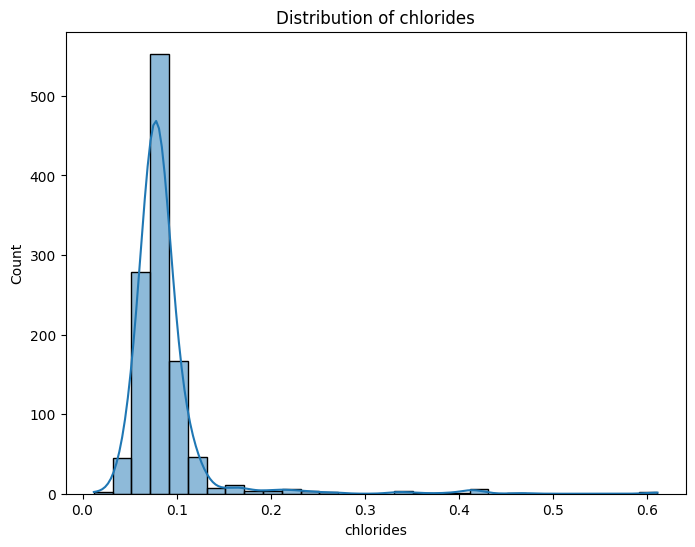

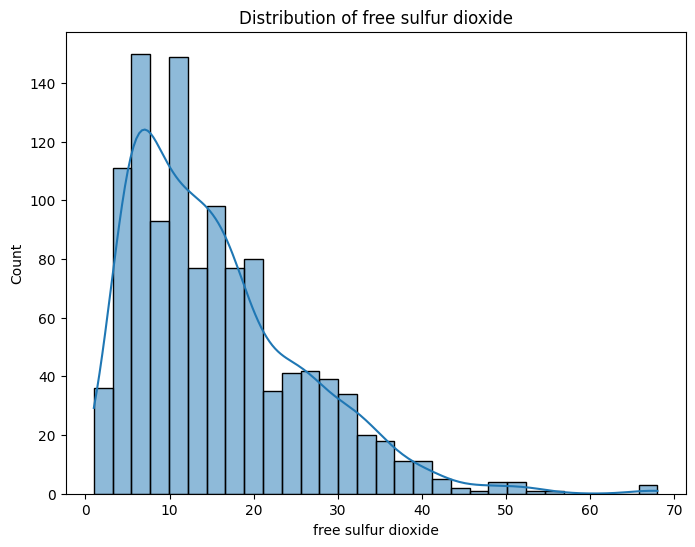

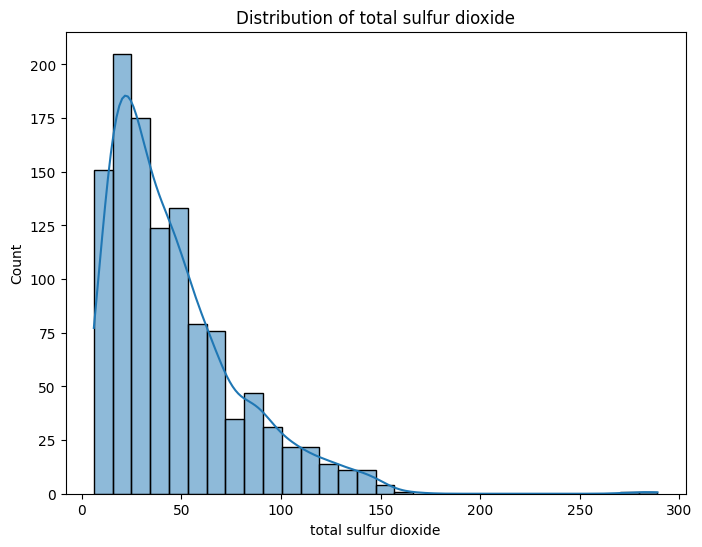

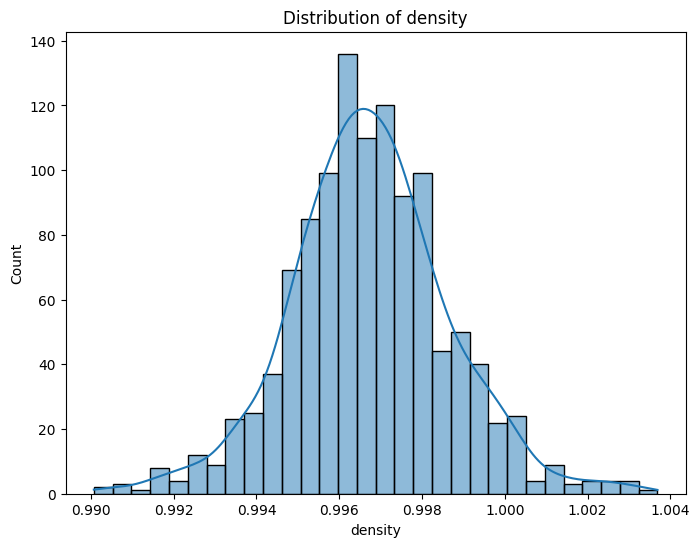

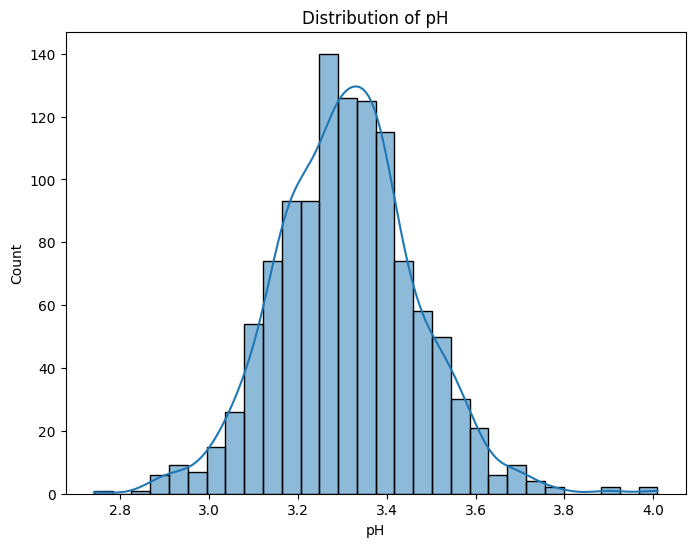

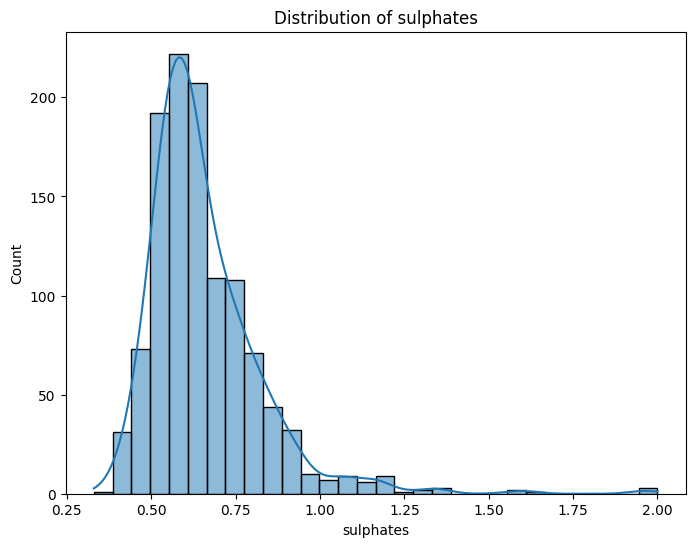

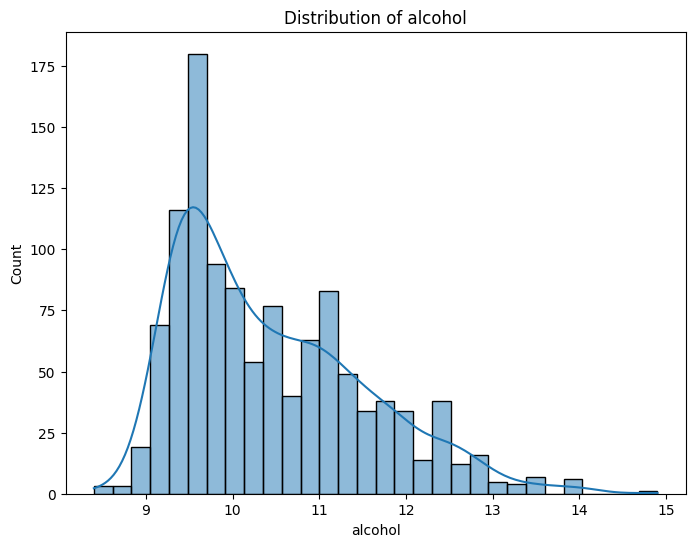

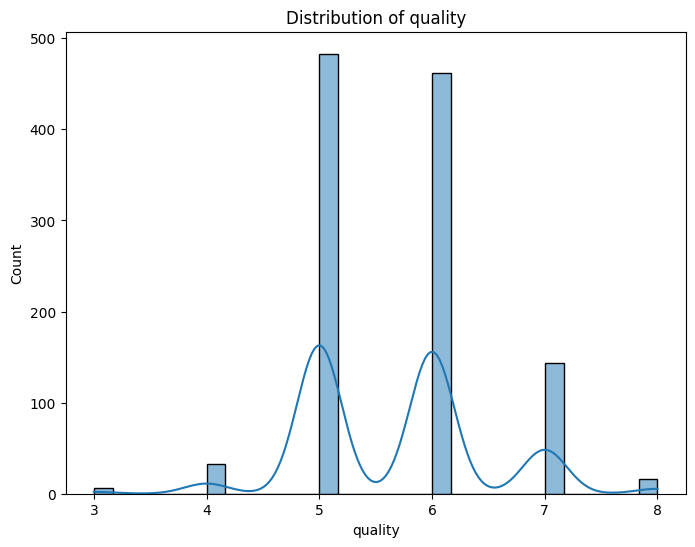

In [ ]:
# Chart 1-Distribution of every feature

for col in df.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col], kde=True, bins= 30)
  plt.title(f"Distribution of {col}")
  plt.show()

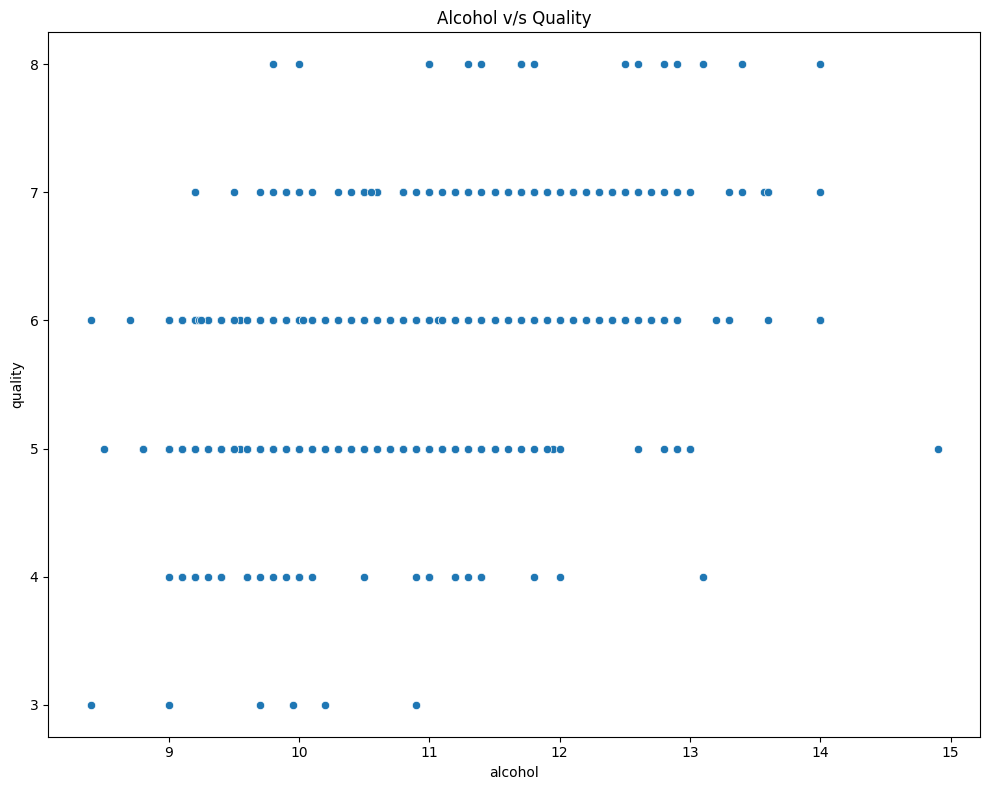

In [ ]:
# Chart 2- Alcohol v/s Quality-

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='alcohol', y='quality', palette="Set2")
plt.title("Alcohol v/s Quality")
plt.tight_layout()
plt.show()

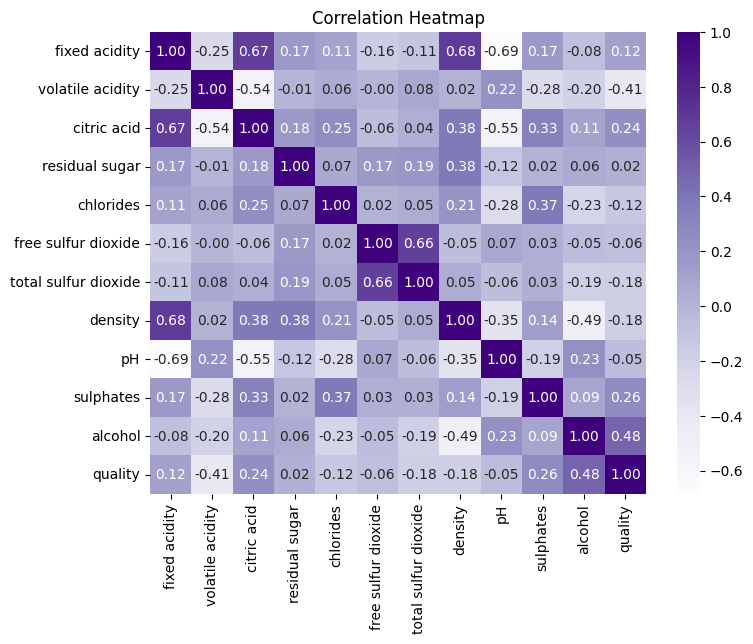

In [ ]:
# Chart 3- Correlation Heatmap-

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Purples',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Feature Engineering-**

In [ ]:
# Convert quality to binary classification

df['quality'] = (df['quality'] > 7).astype(int)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


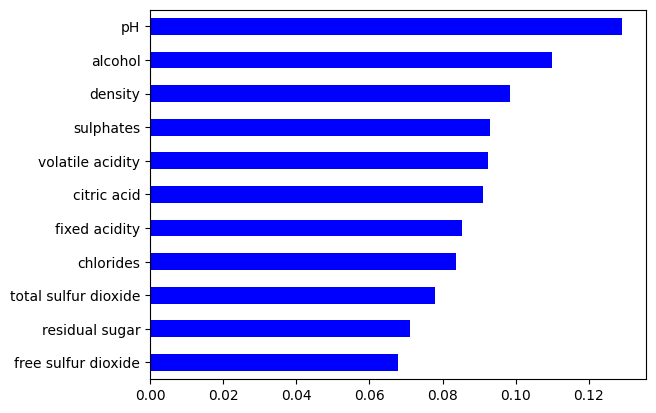

In [ ]:
# Feature selection using feature importances-

from sklearn.ensemble import RandomForestClassifier

X=df.drop(columns=['quality'])
y=df['quality']


model= RandomForestClassifier()
model.fit(X,y)
feat_imp= pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', color='b')
plt.show()

🔹 Skewness Interpretation:

      |Skewness| < 0.5 → Fairly symmetrical (normal distribution) ✅

      0.5 < |Skewness| < 1 → Moderate skewness ⚠️

      |Skewness| > 1 → Highly skewed (needs transformation) ❗

In [ ]:
# Checking skewness of the dataset-

from scipy.stats import skew

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_features].apply(skew).sort_values(ascending=False)
print(skewness)

quality                 8.273554
chlorides               6.018449
residual sugar          4.355371
sulphates               2.493988
total sulfur dioxide    1.663579
free sulfur dioxide     1.229645
fixed acidity           1.043558
alcohol                 0.862180
volatile acidity        0.680653
citric acid             0.371073
pH                      0.220848
density                 0.102261
dtype: float64


In [ ]:
# Fixing skewness by applying log transformation and square root transformation-

# Log Transformation-

df['sulphates'] = np.log1p(df['sulphates'])
df['total sulfur dioxide'] = np.log1p(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log1p(df['free sulfur dioxide'])

# Square Transformation-
df['fixed acidity'] = np.sqrt(df['fixed acidity'])
df['alcohol'] = np.sqrt(df['alcohol'])

In [ ]:
# Rechecking Skew-

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_features].apply(skew).sort_values(ascending=False)
print(skewness)

quality                 8.273554
chlorides               6.018449
residual sugar          4.355371
sulphates               1.674249
alcohol                 0.757982
fixed acidity           0.727375
volatile acidity        0.680653
citric acid             0.371073
pH                      0.220848
density                 0.102261
total sulfur dioxide    0.002583
free sulfur dioxide    -0.091962
dtype: float64


In [ ]:
# Still the skewness of chlorides & residual sugar is not right-
from scipy.stats import boxcox
df['chlorides'], _ = boxcox(df['chlorides'] + 1)  # Adding 1 to avoid zero values
df['residual sugar'], _ = boxcox(df['residual sugar'] + 1)

In [ ]:
# Rechecking Skew-

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_features].apply(skew).sort_values(ascending=False)
print(skewness)

quality                 8.273554
sulphates               1.674249
alcohol                 0.757982
fixed acidity           0.727375
volatile acidity        0.680653
citric acid             0.371073
pH                      0.220848
density                 0.102261
residual sugar          0.007570
total sulfur dioxide    0.002583
free sulfur dioxide    -0.091962
chlorides              -0.207389
dtype: float64




*   Now Skewness is fixed and dataset is well balanced.


*   Skewness of  "quality" column can be ignored because we have converted it into a binary form.





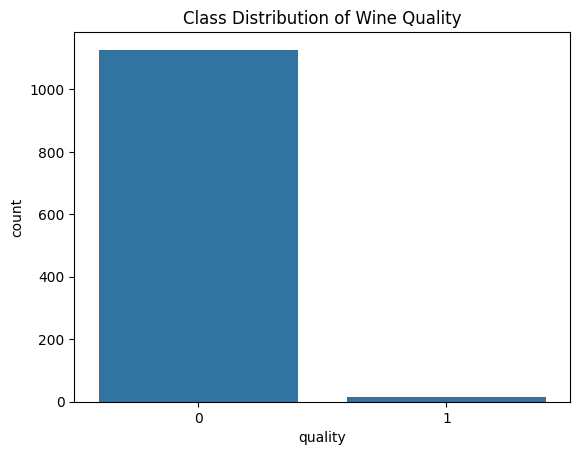

,proportion
quality,
0,0.986002
1,0.013998


In [ ]:
## For checking class imbalance in quality-

# Countplot for class distribution
sns.countplot(x=df['quality'])
plt.title("Class Distribution of Wine Quality")
plt.show()

# Check percentage distribution
df['quality'].value_counts(normalize=True)



*   Here we can see theres an class imbalance in dataset 1s are too low compared to 0s.



In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight

# 📌 Define features (X) and target (y)
X = df.drop(columns=['quality'])
y = df['quality']

# 📌 Stratified Split to Ensure Some `1s` in Test Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Apply SMOTE-Tomek for Balancing
smote_tomek = SMOTETomek(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# 📌 Compute Class Weights for More Robust Balancing
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# 📌 Define Optimized Models
models = {
    "Logistic Regression": LogisticRegression(class_weight=class_weight_dict, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight=class_weight_dict, n_estimators=200, max_depth=10, random_state=42),
    "SVM": SVC(class_weight=class_weight_dict, probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10, n_estimators=200, max_depth=6, random_state=42),

}

# 📌 Train & Evaluate Models with Adjusted Decision Thresholds
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities instead of raw predictions
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of `1`

    # Adjust Decision Threshold (lower to favor `1s`)
    threshold = 0.2  # Instead of 0.5
    y_pred = (y_probs > threshold).astype(int)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"✅ {name} Accuracy: {accuracy:.4f}")
    print(f"📊 Classification Report:\n{report}")


🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.6812
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       226
           1       0.04      1.00      0.08         3

    accuracy                           0.68       229
   macro avg       0.52      0.84      0.44       229
weighted avg       0.99      0.68      0.80       229


🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.9258
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       226
           1       0.11      0.67      0.19         3

    accuracy                           0.93       229
   macro avg       0.55      0.80      0.58       229
weighted avg       0.98      0.93      0.95       229


🔹 Training SVM...
✅ SVM Accuracy: 0.7729
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77     



*   Our best Model is XGB Classifier with 96 Accuracy and good recall.🦖

*   Though the dataset has bias and skewness thats why precision and recall are not as optimum as we should need but we tried to fix it to a certain degree.
